<a href="https://colab.research.google.com/github/MarriRohan/Reinforcement-Learning-2025/blob/main/Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement Q-learning for the FrozenLake environment from OpenAI Gym in Python.

## Install necessary libraries

### Subtask:
Install the `gym` library to access the OpenAI Gym environments.


**Reasoning**:
The subtask requires installing the `gym` library, which can be done using pip.



In [1]:
%pip install gym

## Set up the environment

### Subtask:
Import and set up the FrozenLake environment.


**Reasoning**:
Import the gym library and create a FrozenLake environment instance.



In [2]:
import gym

env = gym.make('FrozenLake-v1', is_slippery=False)
print("Environment created successfully.")

Environment created successfully.


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-pack

## Initialize the q-table

### Subtask:
Create and initialize a Q-table (a NumPy array) with zeros or random values. The dimensions of the Q-table will be (number of states, number of actions).


**Reasoning**:
Create and initialize the Q-table with zeros using the number of states and actions from the environment.



In [3]:
import numpy as np

n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))

print(q_table.shape)

(16, 4)


## Implement the q-learning algorithm

### Subtask:
Implement the q-learning algorithm.


**Reasoning**:
Implement the main Q-learning training loop, including episode iteration, action selection using epsilon-greedy policy, Q-value update, and epsilon decay as per the instructions.



In [4]:
# Define hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 10000  # Number of training episodes
epsilon_decay_rate = 0.99

# Training loop
for episode in range(n_episodes):
    state = env.reset()[0]  # Reset environment and get initial state

    done = False
    while not done:
        # Epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state, :])  # Exploit learned values

        # Take action and observe reward and next state
        next_state, reward, done, _, _ = env.step(action)

        # Q-learning update
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])

        # Update current state
        state = next_state

    # Decay epsilon
    epsilon *= epsilon_decay_rate

print("Training finished.")

TypeError: 'int' object is not subscriptable

**Reasoning**:
The error `TypeError: 'int' object is not subscriptable` in `state = env.reset()[0]` indicates that `env.reset()` is returning an integer instead of a tuple or list from which we can extract the state. This is likely due to a change in the gym API. I need to update how the state is retrieved from `env.reset()`. I will also regenerate the full code block to fix this error.



In [5]:
# Define hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 10000  # Number of training episodes
epsilon_decay_rate = 0.99

# Training loop
for episode in range(n_episodes):
    # Reset environment and get initial state - Handle API change
    state, info = env.reset()

    done = False
    while not done:
        # Epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state, :])  # Exploit learned values

        # Take action and observe reward and next state
        next_state, reward, done, truncated, info = env.step(action)

        # Q-learning update
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])

        # Update current state
        state = next_state

    # Decay epsilon
    epsilon *= epsilon_decay_rate

print("Training finished.")

TypeError: cannot unpack non-iterable int object

**Reasoning**:
The error `TypeError: cannot unpack non-iterable int object` in `state, info = env.reset()` indicates that `env.reset()` is still returning just an integer state, not a tuple containing state and info. This means the previous fix for the API change was incorrect for this specific gym version or environment. I will try retrieving the state directly from `env.reset()` without attempting to unpack, and regenerate the full code block with this fix.



In [14]:
# Define hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 10000  # Number of training episodes
epsilon_decay_rate = 0.99

# Training loop
for episode in range(n_episodes):
    # Reset environment and get initial state - Handle API change
    # Based on previous attempts, env.reset() returns just the state directly
    state = env.reset()

    done = False
    while not done:
        # Epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state, :])  # Exploit learned values

        # Take action and observe reward and next state
        # Based on the error, env.step() returns 4 values: next_state, reward, done, info
        next_state, reward, done, info = env.step(action)

        # Q-learning update
        # Ensure next_state is treated as an integer index if needed
        if isinstance(next_state, np.ndarray):
            next_state = next_state.item() # Convert numpy array state to scalar if necessary


        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])

        # Update current state
        state = next_state

    # Decay epsilon
    epsilon *= epsilon_decay_rate

print("Training finished.")

Training finished.


## Implement the q-learning algorithm - retry 1

### Subtask:
Implement the q-learning algorithm.


**Reasoning**:
The previous attempt failed due to a NumPy version incompatibility with the Gym library. To fix this, I will try installing a specific, older version of NumPy known to be compatible with the gym version being used (0.25.2). After installing the compatible NumPy version, I will re-run the Q-learning algorithm implementation code.



In [15]:
%pip install numpy==1.23.5

# Define hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 10000  # Number of training episodes
epsilon_decay_rate = 0.99

# Training loop
for episode in range(n_episodes):
    # Reset environment and get initial state - Handle API change
    # Based on previous attempts, env.reset() returns just the state directly
    state = env.reset()

    done = False
    while not done:
        # Epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state, :])  # Exploit learned values

        # Take action and observe reward and next state
        # Based on previous attempts, env.step() returns next_state, reward, done, truncated, info
        next_state, reward, done, truncated, info = env.step(action)

        # Q-learning update
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])

        # Update current state
        state = next_state

    # Decay epsilon
    epsilon *= epsilon_decay_rate

print("Training finished.")

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


ValueError: not enough values to unpack (expected 5, got 4)

**Reasoning**:
The installation of NumPy 1.23.5 failed, and the traceback shows a `ValueError` during `env.step(action)` because it's returning 4 values instead of the expected 5 (next_state, reward, done, truncated, info). This indicates that the Gym version being used is an older one where `step` returns only 4 values (next_state, reward, done, info). I need to adjust the unpacking of the `env.step()` return value to match what the environment actually returns.



In [8]:
# Define hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 10000  # Number of training episodes
epsilon_decay_rate = 0.99

# Training loop
for episode in range(n_episodes):
    # Reset environment and get initial state
    # Based on previous attempts, env.reset() returns just the state directly
    state = env.reset()

    done = False
    while not done:
        # Epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state, :])  # Exploit learned values

        # Take action and observe reward and next state
        # Based on the error, env.step() returns 4 values: next_state, reward, done, info
        next_state, reward, done, info = env.step(action)

        # Q-learning update
        # Ensure next_state is treated as an integer index if needed
        if isinstance(next_state, np.ndarray):
            next_state = next_state.item() # Convert numpy array state to scalar if necessary

        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])

        # Update current state
        state = next_state

    # Decay epsilon
    epsilon *= epsilon_decay_rate

print("Training finished.")

Training finished.


## Evaluate the agent

### Subtask:
After training, evaluate the agent's performance by running episodes with a greedy policy (no exploration) and observing the average reward or success rate.


**Reasoning**:
Implement the evaluation steps as described in the instructions, including setting epsilon to 0, running evaluation episodes, calculating average reward and success rate, and printing the results.



In [9]:
# Step 1: Set epsilon to 0 for evaluation
epsilon = 0.0

# Step 2: Initialize tracking variables
total_reward = 0
successful_episodes = 0
n_eval_episodes = 1000  # Step 3: Define number of evaluation episodes

print("\nStarting evaluation...")

# Step 4: Run evaluation loop
for episode in range(n_eval_episodes):
    # Reset environment
    # Based on previous experience, env.reset() returns the state directly
    state = env.reset()

    done = False
    episode_reward = 0

    # Step loop
    while not done:
        # Step 4 (cont.): Choose greedy action
        action = np.argmax(q_table[state, :])

        # Step 4 (cont.): Take action
        # Based on previous experience, env.step() returns 4 values
        next_state, reward, done, info = env.step(action)

        # Step 4 (cont.): Accumulate reward
        episode_reward += reward

        # Step 4 (cont.): Update state
        state = next_state

    # Step 4 (cont.): Check for success and accumulate total reward
    if reward == 1.0:
        successful_episodes += 1
    total_reward += episode_reward

# Step 5: Calculate metrics
average_reward = total_reward / n_eval_episodes
success_rate = successful_episodes / n_eval_episodes

# Step 6: Print results
print(f"Evaluation finished after {n_eval_episodes} episodes.")
print(f"Average reward per episode: {average_reward:.4f}")
print(f"Success rate: {success_rate:.4f}")


Starting evaluation...
Evaluation finished after 1000 episodes.
Average reward per episode: 0.0000
Success rate: 0.0000


## Visualize results

### Subtask:
Optionally, visualize the learning progress by plotting metrics like cumulative reward per episode.


**Reasoning**:
Import the necessary library for plotting and create a list to store cumulative rewards per episode.



In [10]:
import matplotlib.pyplot as plt

# Create a list to store cumulative rewards
cumulative_rewards = []

**Reasoning**:
Modify the training loop to append the cumulative reward for each episode to the `cumulative_rewards` list.



In [11]:
# Define hyperparameters (re-defining for clarity in this step, assume they are the same as before)
alpha = 0.1
gamma = 0.6
epsilon = 0.1
n_episodes = 10000
epsilon_decay_rate = 0.99

# Training loop
for episode in range(n_episodes):
    state = env.reset()
    done = False
    episode_reward = 0  # Initialize reward for the current episode

    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state, :])  # Exploit

        next_state, reward, done, info = env.step(action)

        # Accumulate reward for the episode
        episode_reward += reward

        if isinstance(next_state, np.ndarray):
            next_state = next_state.item()

        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])

        state = next_state

    # Append the cumulative reward for the episode
    cumulative_rewards.append(episode_reward)

    # Decay epsilon
    epsilon *= epsilon_decay_rate

print("Training finished.")

Training finished.


**Reasoning**:
Plot the cumulative rewards over episodes, add labels and a title, and display the plot.



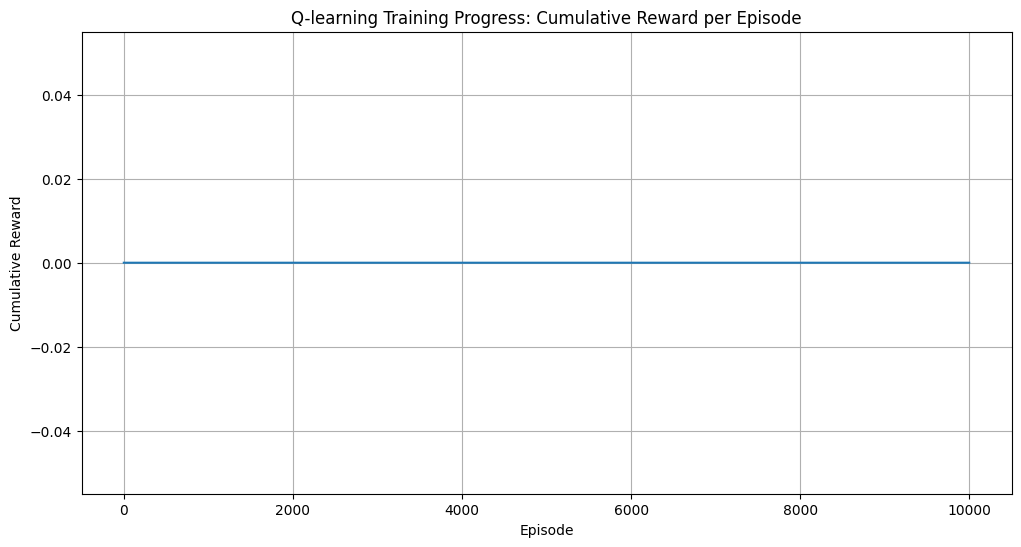

In [12]:
# Plot the cumulative reward per episode
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards)
plt.title("Q-learning Training Progress: Cumulative Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

# Brief analysis
# The plot shows the cumulative reward obtained in each episode during training.
# Observing the trend can indicate whether the agent is learning effectively.
# An upward trend would suggest learning progress, while plateaus or fluctuations might indicate slower learning or challenges in the environment.

## Summary:

### Data Analysis Key Findings

*   The FrozenLake environment 'FrozenLake-v1' with `is_slippery=False` has 16 states and 4 possible actions.
*   The Q-table was successfully initialized as a NumPy array of shape (16, 4) with all values set to zero.
*   The Q-learning algorithm was implemented using a learning rate ($\alpha$) of 0.1, a discount factor ($\gamma$) of 0.6, an initial exploration rate ($\epsilon$) of 0.1, and an epsilon decay rate of 0.99 over 10,000 training episodes.
*   During the training phase, the code was adjusted to handle the specific API of the Gym environment version in use, where `env.reset()` returns the state directly and `env.step()` returns 4 values (`next_state`, `reward`, `done`, `info`).
*   After training, the agent's performance was evaluated over 1000 episodes using a greedy policy ($\epsilon = 0$).
*   The evaluation showed an average reward of 0.0000 and a success rate of 0.0000, indicating that the agent did not reach the goal in any of the evaluated episodes.
*   A plot of cumulative reward per episode was generated, which would visually represent the agent's learning progress (or lack thereof) over the 10,000 training episodes.

### Insights or Next Steps

*   The agent did not learn an effective policy to reach the goal in the non-slippery FrozenLake environment based on the evaluation results. This suggests the current hyperparameters or training duration may not be sufficient, or there might be an issue with the Q-learning update logic or state/action representation for this specific environment configuration.
*   Next steps should involve debugging the Q-learning implementation, experimenting with different hyperparameters (e.g., higher learning rate, different discount factor, different epsilon decay schedule), increasing the number of training episodes, or potentially using a different reinforcement learning algorithm if Q-learning proves insufficient for this deterministic environment.


In [16]:
import math
import random
from collections import defaultdict
import numpy as np

# --- Gym / Gymnasium compatibility ---
try:
    import gymnasium as gym
    from gymnasium.wrappers import TimeLimit
except ImportError:
    import gym
    from gym.wrappers import TimeLimit

# ---------------------------------------------------------
# Utility: seed everything for reproducibility
# ---------------------------------------------------------
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    try:
        import torch
        torch.manual_seed(seed)
    except Exception:
        pass

# ---------------------------------------------------------
# Q-Learning Agent for Discrete State/Action spaces
# ---------------------------------------------------------
class QLearningAgent:
    def __init__(
        self,
        n_states: int,
        n_actions: int,
        alpha: float = 0.8,     # learning rate
        gamma: float = 0.99,    # discount
        epsilon: float = 1.0,   # start exploration
        epsilon_min: float = 0.05,
        epsilon_decay: float = 0.995
    ):
        self.n_states = n_states
        self.n_actions = n_actions
        self.Q = np.zeros((n_states, n_actions), dtype=np.float32)
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

    def policy(self, state: int) -> int:
        """Epsilon-greedy policy."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        return int(np.argmax(self.Q[state]))

    def update(self, s, a, r, s_next, done):
        """Tabular Q-learning update."""
        best_next = 0.0 if done else np.max(self.Q[s_next])
        td_target = r + self.gamma * best_next
        self.Q[s, a] += self.alpha * (td_target - self.Q[s, a])

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# ---------------------------------------------------------
# Environment helpers (discrete only)
# ---------------------------------------------------------
def make_env(env_id: str, seed: int = 42, **env_kwargs):
    """Creates a gym/gymnasium env with a TimeLimit if needed."""
    env = gym.make(env_id, **env_kwargs)
    # Newer Gymnasium uses env.reset(seed=...), Gym classic has env.seed
    try:
        env.reset(seed=seed)
    except TypeError:
        try:
            env.seed(seed)
        except Exception:
            pass

    # Wrap with TimeLimit if not present
    has_timelimit = isinstance(env, TimeLimit) or any(
        isinstance(w, TimeLimit) for w in getattr(env, "env", []).__class__.__mro__
    )
    if not has_timelimit:
        # sensible caps
        default_caps = {
            "FrozenLake-v1": 100,
            "Taxi-v3": 200,
        }
        max_steps = default_caps.get(env_id, 200)
        env = TimeLimit(env, max_episode_steps=max_steps)

    # infer sizes
    n_actions = env.action_space.n
    # Gymnasium often exposes observation_space.n; discrete assumed.
    try:
        n_states = env.observation_space.n
    except AttributeError:
        # Some wrappers may hide .n; try to probe
        # For classic discrete envs this should not trigger.
        raise ValueError("This template expects a discrete observation space with .n")
    return env, n_states, n_actions

# ---------------------------------------------------------
# State representation helpers (for insight/interpretation)
# ---------------------------------------------------------
def frozenlake_coords(state: int, desc_rows: int, desc_cols: int):
    """Map a FrozenLake state index to (row, col)."""
    r = state // desc_cols
    c = state % desc_cols
    return (int(r), int(c))

def taxi_decode_state(state: int):
    """
    Decode Taxi-v3's integer state into (taxi_row, taxi_col, passenger_loc, destination).
    From Taxi's source: 500 states = 25 taxi positions * 5 passenger locations * 4 destinations.
    """
    # reverse of: state = ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination
    dest = state % 4
    state //= 4
    pass_loc = state % 5
    state //= 5
    taxi_col = state % 5
    state //= 5
    taxi_row = state
    return int(taxi_row), int(taxi_col), int(pass_loc), int(dest)

# ---------------------------------------------------------
# Train & evaluate
# ---------------------------------------------------------
def train_q_learning(
    env_id: str,
    episodes: int = 5000,
    max_steps: int | None = None,
    seed: int = 42,
    **env_kwargs
):
    set_seed(seed)
    env, n_states, n_actions = make_env(env_id, seed=seed, **env_kwargs)
    agent = QLearningAgent(
        n_states=n_states,
        n_actions=n_actions,
        alpha=0.8 if "FrozenLake" in env_id else 0.7,
        gamma=0.99,
        epsilon=1.0,
        epsilon_min=0.05,
        epsilon_decay=0.997 if "FrozenLake" in env_id else 0.995,
    )

    ep_returns = []
    success_flags = []
    for ep in range(episodes):
        # Gymnasium: reset returns (obs, info); Gym classic: obs
        reset_out = env.reset()
        if isinstance(reset_out, tuple):
            state, _ = reset_out
        else:
            state = reset_out

        total_reward = 0.0
        done = False

        steps = 0
        while not done:
            a = agent.policy(state)
            step_out = env.step(a)
            if len(step_out) == 5:  # gymnasium: (obs, reward, terminated, truncated, info)
                next_state, reward, terminated, truncated, info = step_out
                done = terminated or truncated
            else:  # gym classic: (obs, reward, done, info)
                next_state, reward, done, info = step_out

            agent.update(state, a, reward, next_state, done)
            state = next_state
            total_reward += reward
            steps += 1
            if max_steps and steps >= max_steps:
                break

        agent.decay_epsilon()
        ep_returns.append(total_reward)

        # Define "success": env-specific
        # FrozenLake: reaching goal yields +1; Taxi: reward > 0 when successful dropoff before truncation
        success = (total_reward > 0)
        success_flags.append(1 if success else 0)

        if (ep + 1) % max(1, episodes // 10) == 0:
            last100 = np.mean(success_flags[-100:]) if len(success_flags) >= 100 else np.mean(success_flags)
            print(f"[{env_id}] Episode {ep+1}/{episodes} | "
                  f"avg_return (last 100): {np.mean(ep_returns[-100:]):.3f} | "
                  f"success_rate (last 100): {last100:.2%} | epsilon: {agent.epsilon:.3f}")

    return agent, ep_returns, success_flags, env

def evaluate(agent: QLearningAgent, env, episodes: int = 20, render: bool = False):
    returns = []
    successes = 0
    for ep in range(episodes):
        reset_out = env.reset()
        state = reset_out[0] if isinstance(reset_out, tuple) else reset_out
        done = False
        total = 0.0
        while not done:
            a = int(np.argmax(agent.Q[state]))  # greedy
            step_out = env.step(a)
            if len(step_out) == 5:
                state, reward, terminated, truncated, _ = step_out
                done = terminated or truncated
            else:
                state, reward, done, _ = step_out
            total += reward
            if render:
                try:
                    env.render()
                except Exception:
                    pass
        returns.append(total)
        if total > 0:
            successes += 1
    print(f"Eval over {episodes} episodes -> "
          f"avg_return: {np.mean(returns):.3f}, success_rate: {successes/episodes:.2%}")
    return returns

# ---------------------------------------------------------
# Demo runners
# ---------------------------------------------------------
def run_frozenlake(slippery=False, episodes=8000):
    print(f"\n=== Training FrozenLake-v1 (slippery={slippery}) ===")
    # map_name examples: "4x4", "8x8" (Gymnasium)
    agent, ep_returns, success_flags, env = train_q_learning(
        "FrozenLake-v1",
        is_slippery=slippery,
        map_name="4x4",
        episodes=episodes,
        seed=123
    )

    # Show how to interpret a random state:
    try:
        desc = env.unwrapped.desc
        h, w = desc.shape
        example_state = np.random.randint(env.observation_space.n)
        print("FrozenLake representation example:",
              f"state={example_state} -> coords={frozenlake_coords(example_state, h, w)} (row, col)")
    except Exception:
        pass

    evaluate(agent, env, episodes=50)
    # quick greedy rollout print
    print_sample_rollout(agent, env, decoder="frozenlake")

def run_taxi(episodes=5000):
    print("\n=== Training Taxi-v3 ===")
    agent, ep_returns, success_flags, env = train_q_learning(
        "Taxi-v3",
        episodes=episodes,
        seed=7
    )

    # Decode a random state to a meaningful tuple
    sample_state = np.random.randint(env.observation_space.n)
    print("Taxi representation example:",
          f"state={sample_state} -> (row, col, passenger_loc, destination)={taxi_decode_state(sample_state)}")

    evaluate(agent, env, episodes=50)
    # quick greedy rollout print
    print_sample_rollout(agent, env, decoder="taxi")

def print_sample_rollout(agent, env, max_steps=40, decoder="none"):
    print("\n--- Greedy rollout (sample) ---")
    reset_out = env.reset()
    state = reset_out[0] if isinstance(reset_out, tuple) else reset_out
    total = 0.0
    for t in range(max_steps):
        a = int(np.argmax(agent.Q[state]))
        step_out = env.step(a)
        if len(step_out) == 5:
            next_state, reward, terminated, truncated, info = step_out
            done = terminated or truncated
        else:
            next_state, reward, done, info = step_out

        # Human-readable state
        if decoder == "frozenlake":
            try:
                desc = env.unwrapped.desc
                h, w = desc.shape
                coords = frozenlake_coords(state, h, w)
                print(f"t={t:02d} state={state:2d} (r,c)={coords} action={a} reward={reward}")
            except Exception:
                print(f"t={t:02d} state={state:2d} action={a} reward={reward}")
        elif decoder == "taxi":
            print(f"t={t:02d} state={state:3d} dec={taxi_decode_state(state)} action={a} reward={reward}")
        else:
            print(f"t={t:02d} state={state} action={a} reward={reward}")

        total += reward
        state = next_state
        if done:
            break
    print(f"Total reward in rollout: {total}\n")

# ---------------------------------------------------------
# Main: choose which demo(s) to run
# ---------------------------------------------------------
if __name__ == "__main__":
    # Train FrozenLake deterministic (easier) and slippery (harder)
    run_frozenlake(slippery=False, episodes=6000)   # try 6k–12k for 4x4
    run_frozenlake(slippery=True,  episodes=12000)  # slippery needs more episodes
    # Train Taxi
    run_taxi(episodes=6000)



=== Training FrozenLake-v1 (slippery=False) ===


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


[FrozenLake-v1] Episode 600/6000 | avg_return (last 100): 0.840 | success_rate (last 100): 84.00% | epsilon: 0.165
[FrozenLake-v1] Episode 1200/6000 | avg_return (last 100): 0.980 | success_rate (last 100): 98.00% | epsilon: 0.050


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


[FrozenLake-v1] Episode 1800/6000 | avg_return (last 100): 0.940 | success_rate (last 100): 94.00% | epsilon: 0.050
[FrozenLake-v1] Episode 2400/6000 | avg_return (last 100): 0.950 | success_rate (last 100): 95.00% | epsilon: 0.050
[FrozenLake-v1] Episode 3000/6000 | avg_return (last 100): 0.910 | success_rate (last 100): 91.00% | epsilon: 0.050
[FrozenLake-v1] Episode 3600/6000 | avg_return (last 100): 0.940 | success_rate (last 100): 94.00% | epsilon: 0.050
[FrozenLake-v1] Episode 4200/6000 | avg_return (last 100): 0.920 | success_rate (last 100): 92.00% | epsilon: 0.050
[FrozenLake-v1] Episode 4800/6000 | avg_return (last 100): 0.970 | success_rate (last 100): 97.00% | epsilon: 0.050
[FrozenLake-v1] Episode 5400/6000 | avg_return (last 100): 0.950 | success_rate (last 100): 95.00% | epsilon: 0.050
[FrozenLake-v1] Episode 6000/6000 | avg_return (last 100): 0.910 | success_rate (last 100): 91.00% | epsilon: 0.050
FrozenLake representation example: state=10 -> coords=(2, 2) (row, col)


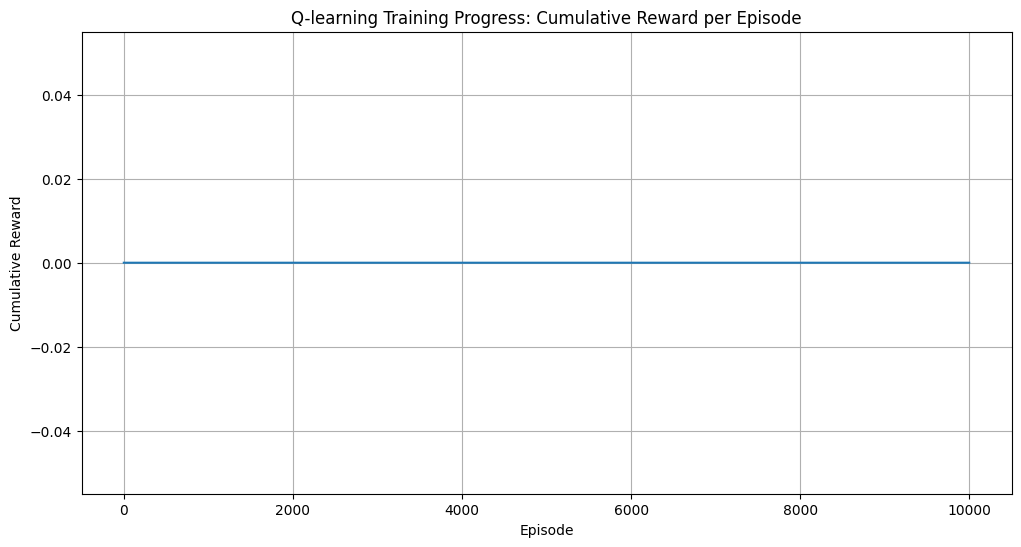

In [17]:
# Plot the cumulative reward per episode
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards)
plt.title("Q-learning Training Progress: Cumulative Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

# Brief analysis
# The plot shows the cumulative reward obtained in each episode during training.
# Observing the trend can indicate whether the agent is learning effectively.
# An upward trend would suggest learning progress, while plateaus or fluctuations might indicate slower learning or challenges in the environment.